In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#importing neccessary ibraries for data ecploration and using our dataset

## **1. Data Exploration**
We have choosen 2 different data set 1 for the KNN and ANN and one for CNN as image data works much better with CNN rather than Numerical data the first data set used is Car eveluation data set the data set can be foudn here link=(https://archive.ics.uci.edu/dataset/19/car+evaluation)






In [131]:
df = pd.read_csv('car.data')
#import the data set from locally installed copy
# the dataset is named df wwhich is a common term used to name dataframe

In [132]:
df.isnull().sum()
#checking wheter our data set have any null values

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

We found that the data set had no null values which means there are no missing values in the dataset

In [133]:
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [134]:
df.columns
#to see how columns are named

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [135]:
df.shape
#shape of the dataset

(1727, 7)

In [136]:
df = df.rename(columns ={'vhigh': 'buying', 'vhigh.1':'maint', '2':'doors', '2.1': 'persons', 'small':'lug_boot', 'low':'safety','unacc':'Class'})

# Renaiming the columns for the ease of reading and accessing data set according to (car.names) file in the data zip folder

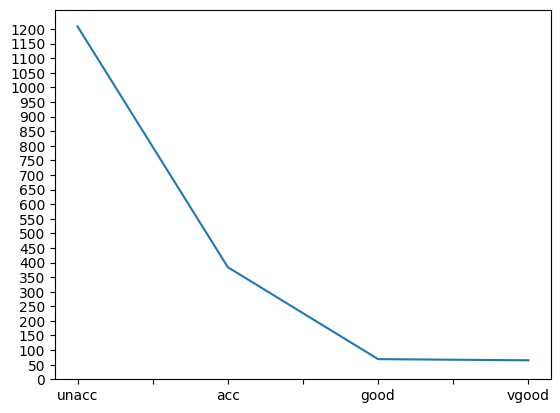

In [137]:
df['Class'].value_counts().plot(kind='line')
plt.yticks(range(0, max(df['Class'].value_counts()) + 5, 50))
plt.show()
# distribution of class column

In [138]:
value_counts = df['Class'].value_counts()
print(value_counts)
#checking values count for each label in CLass column

unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64


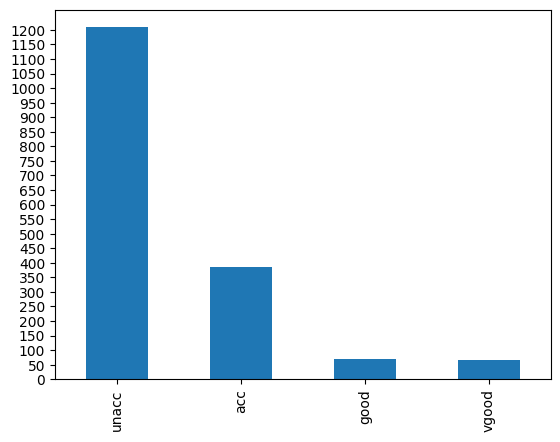

In [139]:
df['Class'].value_counts().plot(kind='bar')
plt.yticks(range(0, max(df['Class'].value_counts()) + 5, 50))
plt.show()

#checking values fro each column using a bar chart

In [140]:
df.describe()
# using describe function which tells us the number of counts for each column basically describes the whole data set

,buying,maint,doors,persons,lug_boot,safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


as we can see we did not get mean values so now we will check if our values are all numerical

In [141]:
df.info()
# cheking if any values are missing or and to find out which datatype the values are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Here we can see that all of our columns are of object type

In [142]:
# label encoding to change the data type , for machine leaarnig
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder1.fit_transform(df[column])


Since all our columns are in object type we have converted them into numerical form using label encoder on each column

In [143]:
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


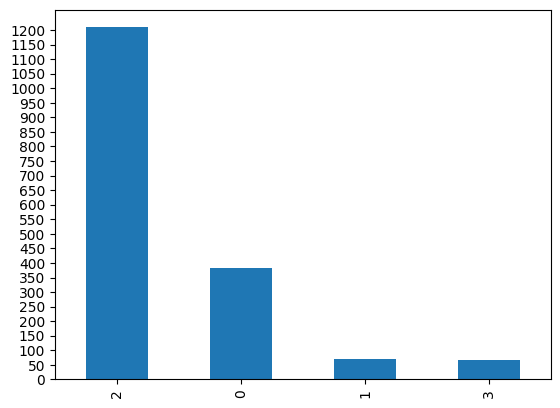

In [144]:
df['Class'].value_counts().plot(kind='bar')
plt.yticks(range(0, max(df['Class'].value_counts()) + 5, 50))
plt.show()
#checking values fro Class column using a bar chart

(array([ 384.,    0.,    0.,    0.,    0.,   69.,    0.,    0., 1209.,
          65.]),
 array([0.        , 0.17320508, 0.34641016, 0.51961524, 0.69282032,
        0.8660254 , 1.03923048, 1.21243557, 1.38564065, 1.55884573,
        1.73205081]),
 <BarContainer object of 10 artists>)

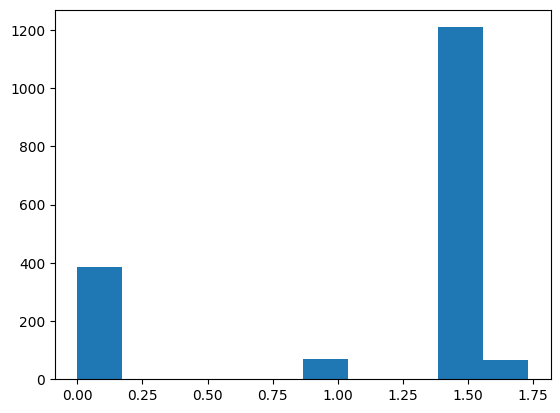

In [145]:
plt.hist(np.sqrt(df.Class))
#square rooting the data set to checking if it makes the data equal

In [146]:
df.describe()
# suing describe function to see mean max and count

,buying,maint,doors,persons,lug_boot,safety,Class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


In [147]:
df.Class.unique()
# cheking how many unique class are there in the Class after label encoding

array([2, 0, 3, 1])

<Axes: >

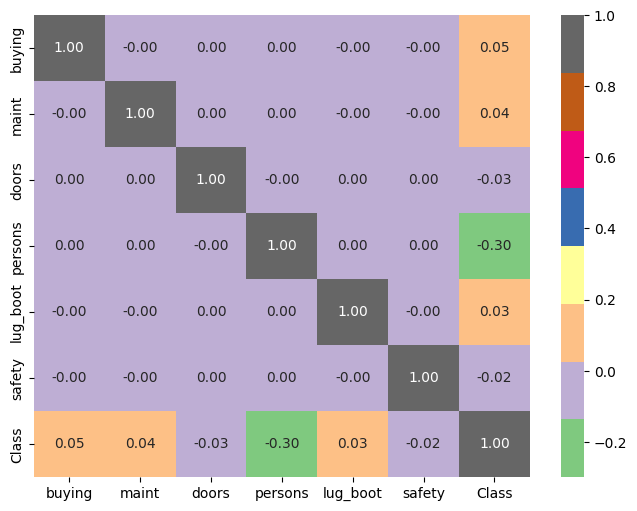

In [148]:
# Data correlation
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap=plt.cm.Accent, fmt='.2f')

we can see that there is between any of the feature columns so we canot drop any of teh columns based on the correlation

## **2. KNN(K-Nearest Neighbor Model)**

In [149]:
#splitting data frame into two parts one with feature and one with target for KNN
inputs= df.iloc[:, :-1].values
target= df.iloc[:, -1].values

In [150]:
# Using standar scalar to scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
inputs= sc.fit_transform(inputs)

In [151]:
#feature and target shape
print(" Features Shape",inputs.shape,"\n","Target Shape",target.shape)

 Features Shape (1727, 6) 
 Target Shape (1727,)


In [152]:
#Spliting data for KNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2, random_state=40)

In [153]:
#Importing KNN and passing training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
K_val= range(1,10)                                   #different k values for comparing acc
acc_values=[]                                        # list is to store different accuracy values
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
classifier1=KNeighborsClassifier(n_neighbors=K_val, p=2, metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [154]:
# printing recall precision,accuracy recall and support
y_pred= classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,y_pred))
#print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        71
           1       1.00      0.54      0.70        13
           2       0.99      0.99      0.99       249
           3       1.00      0.85      0.92        13

    accuracy                           0.96       346
   macro avg       0.96      0.83      0.88       346
weighted avg       0.97      0.96      0.96       346



In [155]:
# passing diffeent k values (1-9) in the knn classifier to compare the accuracy on different k values.
for k in K_val:
    classifier1= KNeighborsClassifier(n_neighbors=k)
    classifier1.fit(x_train, y_train)
    y_pred1= classifier1.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred1)
    acc_values.append(accuracy)

In [156]:
predictions = classifier.predict(x_test)
print(predictions)
print(y_test)
y_test.shape

[2 2 2 2 2 2 0 2 2 0 2 2 2 2 0 1 2 0 2 2 2 2 0 2 0 2 2 2 3 2 2 2 2 2 2 1 0
 2 2 0 2 2 0 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 2 2 0 2 0 2
 1 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 2 0 0 0 2 0 2 2 0 2 1 2 2 0 2 3 2 2 2 0 2 2 0 0 0 0 2 2 2 2 2 0 0
 2 0 2 3 2 2 2 0 0 2 2 0 3 2 2 2 2 3 2 2 2 2 0 2 0 2 2 2 2 0 3 2 0 2 3 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 3 2 0 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 3 0 0 0
 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2 3 0 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 0 2
 0 2 0 2 2 2 0 2 2 1 2 2 2]
[2 2 2 2 2 2 1 2 2 0 2 2 2 2 0 1 2 0 2 2 2 2 0 2 0 2 2 2 3 2 2 2 2 2 2 1 0
 2 2 0 2 2 0 2 2 1 2 3 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 2 2 0 2 0 2
 1 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 0 2 3 2 2 0 2 2 2 2 2 2 0 2 1 2 2 2 2
 2 2 2 2 2 1 0 0 2 0 2 2 0 2 1 0 2 0 2 3 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0

(346,)

In [157]:
#accuracy of KNN Model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(score)

0.9624277456647399


In [158]:
# we can see that we get the highest accuraracy when k=7
print (acc_values)
K_val

[0.9508670520231214, 0.8757225433526011, 0.9248554913294798, 0.8728323699421965, 0.9595375722543352, 0.9566473988439307, 0.9624277456647399, 0.9364161849710982, 0.9364161849710982]


range(1, 10)

In [159]:
cc=confusion_matrix(y_test, predictions)

<Axes: >

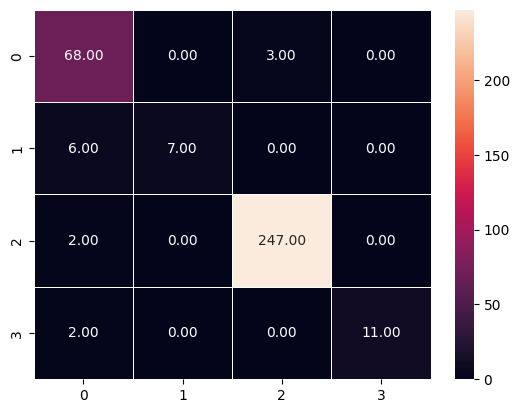

In [160]:
sns.heatmap(cc, annot=True, linewidths= .4,fmt='.2f')

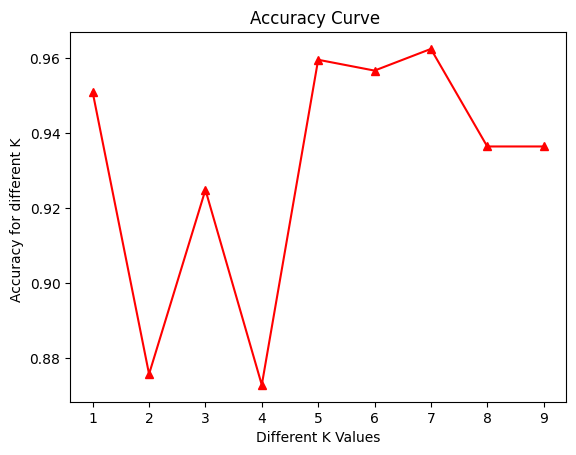

In [161]:
# Accuracy Curve on different K values
plt.plot(K_val, acc_values, marker='^', c='r')
plt.title('Accuracy Curve ')
plt.xlabel('Different K Values')
plt.ylabel('Accuracy for different K ')
plt.show()

# **3. ANN (Artifical Neural Network)**

In [162]:
# Data Split for ANN
inputs1= df.iloc[:, :-1].values
target1= df.iloc[:, -1].values

In [163]:
# Suing Lable binazer to make the target variable binary as binary variables wor better with ANN
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
target1= lb.fit_transform(target1)

In [164]:
target1
# display target1

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [165]:
# Scalling Inputs(features)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
inputs1= sc.fit_transform(inputs1)

In [166]:
#test train split
from sklearn.model_selection import train_test_split
x_train_ann,x_test_ann,y_train_ann,y_test_ann=train_test_split(inputs1,target1,test_size=0.2)

In [167]:
# importing keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [168]:
#keras sequential model
model = Sequential()

model.add(Dense(25,input_dim=6, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [169]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#compiling the keras model

In [170]:
# fitting the model
history=model.fit(x_train_ann,y_train_ann, epochs=30, batch_size=3 , validation_data=(x_test_ann,y_test_ann))

Epoch 1/30
461/461 [==============================] - 2s 3ms/step - loss: 0.8150 - accuracy: 0.6923 - val_loss: 0.6466 - val_accuracy: 0.7139
Epoch 2/30
461/461 [==============================] - 1s 3ms/step - loss: 0.6356 - accuracy: 0.7277 - val_loss: 0.5077 - val_accuracy: 0.8035
Epoch 3/30
461/461 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7915 - val_loss: 0.4077 - val_accuracy: 0.8555
Epoch 4/30
461/461 [==============================] - 2s 4ms/step - loss: 0.4066 - accuracy: 0.8277 - val_loss: 0.3532 - val_accuracy: 0.8324
Epoch 5/30
461/461 [==============================] - 3s 6ms/step - loss: 0.3557 - accuracy: 0.8545 - val_loss: 0.3149 - val_accuracy: 0.8815
Epoch 6/30
461/461 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8581 - val_loss: 0.3040 - val_accuracy: 0.8439
Epoch 7/30
461/461 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.8675 - val_loss: 0.2688 - val_accuracy: 0.8786
Epoch 

In [171]:
score = model.evaluate(x_test_ann,y_test_ann,verbose=0) # testing accuracy
trainAcc =model.evaluate(x_train_ann,y_train_ann,verbose=0) #training accuracy
print('Train Accuracy',trainAcc[1])
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Train Accuracy 0.9688631296157837
Test Loss: 0.12100805342197418
Test Accuracy: 0.9421965479850769


In [172]:
#weights, biases = model.layers[0].get_weights()
#print(weights,biases)

In [173]:
#print(model.get_weights())

In [174]:
!pip install scikeras
#!pip install --upgrade tensorflow

import keras as keras
from sklearn.model_selection import cross_val_score,KFold
from scikeras.wrappers import KerasClassifier

In [175]:
# 4 fold cross-validation
Foldk = KFold(n_splits=4,random_state=42,shuffle=True)

classifier = KerasClassifier(model,epochs=30,batch_size=7)

accuracies1= cross_val_score(estimator=classifier,X=inputs1,y=target1,cv=Foldk)

Epoch 1/26
185/185 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9853
Epoch 2/26
185/185 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9938
Epoch 3/26
185/185 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9869
Epoch 4/26
185/185 [==============================] - 1s 4ms/step - loss: 0.0384 - accuracy: 0.9892
Epoch 5/26
185/185 [==============================] - 1s 6ms/step - loss: 0.0362 - accuracy: 0.9931
Epoch 6/26
185/185 [==============================] - 1s 6ms/step - loss: 0.0360 - accuracy: 0.9923
Epoch 7/26
185/185 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9938
Epoch 8/26
185/185 [==============================] - 1s 5ms/step - loss: 0.0361 - accuracy: 0.9915
Epoch 9/26
185/185 [==============================] - 1s 5ms/step - loss: 0.0322 - accuracy: 0.9931
Epoch 10/26
185/185 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9892

In [176]:
#accuracy of 4 fold cross validation
accuracies1


array([0.9837963 , 0.98148148, 0.99537037, 0.9837587 ])

In [177]:
#mean of 4 fold cross validation
accuracies1.mean()

0.9861017122110509

In [178]:
#standar deviation in accuracies
accuracies1.std()

0.005432752561275466

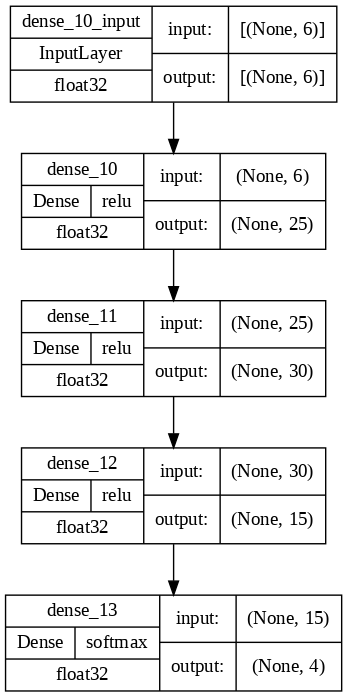

In [179]:
# displaying the model diagram
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='ann.png',show_shapes=True,show_layer_names=True,show_dtype=True,show_layer_activations=True,dpi=100)

<function matplotlib.pyplot.show(close=None, block=None)>

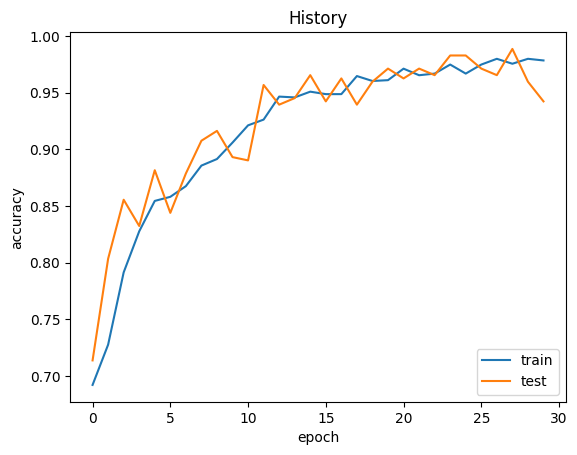

In [180]:
# test train accuracy graph by number of epochs
# used this to get the best number of epochs for best tain and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('History')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

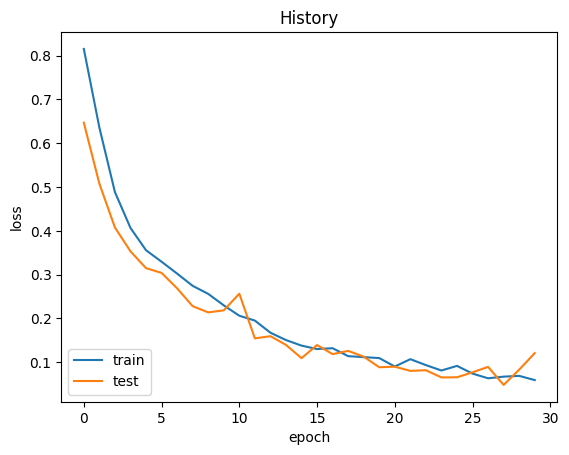

In [181]:
# loss graphy based on test train epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower left')
plt.show


In [182]:
# an overview image of the network
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

# **4. CNN (Convolutional Neural Network)**

In [183]:
# retiveing MNIST data from keras datasets
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
# imporing DENSE -> so each neuron of the present layer will be connected to the previous layer
#importing CONV2D -> since MINIST a image dataset , for convolution operation
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
import keras
%matplotlib inline

In [184]:
(X_train, y_train), (X_test, y_test)=mnist.load_data(  )

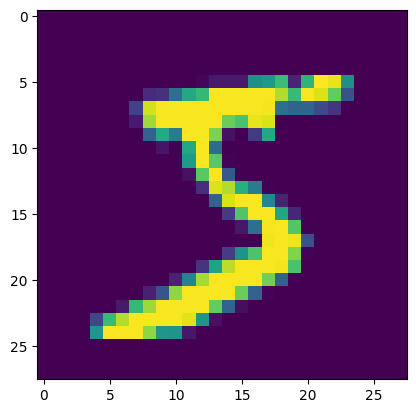

In [185]:
plt.imshow(X_train[0])

In [186]:
classes=10

In [187]:
X_train.shape

(60000, 28, 28)

In [188]:
X_train.astype('float32') # so that during normalization , values do not get truncated
X_train.reshape(60000,28,28,1) # our image is gray scaled
X_train=X_train/255  # scaling/norma pixel values so that the values stays between 0 - 1

In [189]:
X_test.shape

(10000, 28, 28)

In [190]:
X_test.astype('float32')
X_test.reshape(10000,28,28,1)
X_test=X_test/255

In [191]:
y_train= keras.utils.to_categorical(y_train,classes)
y_test= keras.utils.to_categorical(y_test,classes)


In [192]:
m=Sequential()

In [193]:
m.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),strides=(1, 1),  padding='same', activation='relu' )) #  3 by 3 filter size , 32 filter , stride ( filter movement)=1 , relu for non linearity
m.add(MaxPooling2D()) #pooling hidhest values from each filter

m.add(Conv2D(64, kernel_size=(3,3),  padding='same', activation='relu' ))
m.add(MaxPooling2D())

m.add(Conv2D(128, kernel_size=(3,3),  padding='same', activation='relu' ))
m.add(MaxPooling2D())

m.add(Conv2D(32, kernel_size=(3,3),  padding='same', activation='relu' ))
m.add(MaxPooling2D())

In [194]:
m.add(Flatten()) # to connect concolution to fully connected layer .

In [195]:
m.add(Dense(512, activation='relu'))

m.add(Dense(10, activation='softmax')) # since this is a classification problem

In [196]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [197]:
m.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

In [198]:
cnn=m.fit(X_train,y_train,epochs=5 , validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 190s 100ms/step - loss: 0.1618 - accuracy: 0.9483 - val_loss: 0.0438 - val_accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0310 - val_accuracy: 0.9903


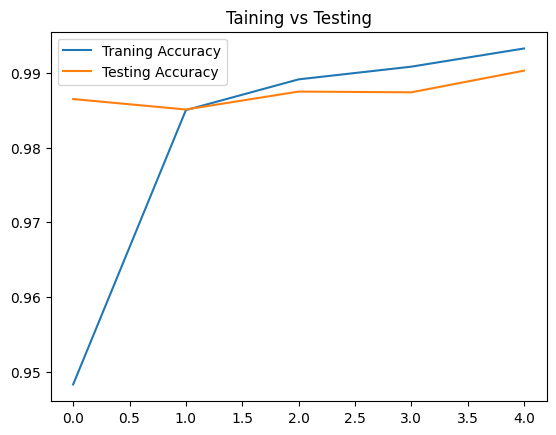

In [199]:
plt.plot(cnn.history['accuracy'],label='Traning Accuracy')
plt.plot(cnn.history['val_accuracy'],label='Testing Accuracy')
plt.title('Taining vs Testing')
plt.legend()
plt.show()

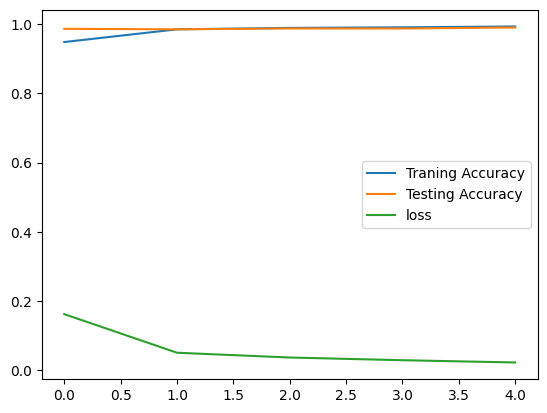

In [200]:
plt.plot(cnn.history['accuracy'], label='Traning Accuracy')
plt.plot(cnn.history['val_accuracy'],label='Testing Accuracy')
plt.plot(cnn.history['loss'],label='loss')
plt.legend()
plt.show()